# Diabetes

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df=pd.read_excel('Dataset 2 _ Early-stage diabetes risk prediction dataset (ESDRPD).xlsx')
df.head()

ImportError: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.

In [ ]:
df.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
Sudden weight loss    0
Weakness              0
Polyphagia            0
Genital thrush        0
Visual blurring       0
Itching               0
Irritability          0
Delayed healing       0
Partial paresis       0
Muscle stiffness      0
Alopecia              0
Obesity               0
Class                 0
dtype: int64

C:\Users\Nagendra Prasad\anaconda\Lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='Class', ylabel='count'>

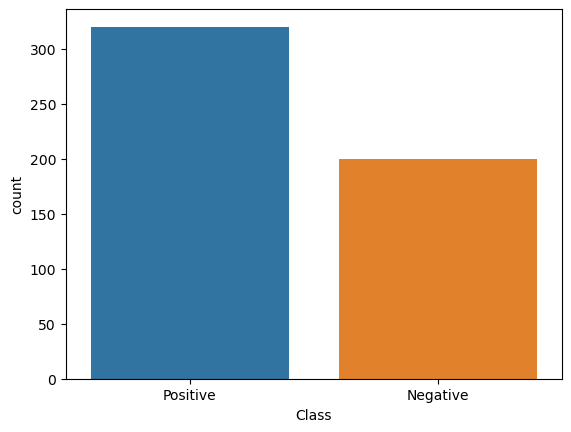

In [ ]:
sns.countplot(df['Class'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
X=df.drop(columns=['Class'])

In [ ]:
le=LabelEncoder()
X_coded=X.apply(le.fit_transform)
X_coded
y_coded=le.fit_transform(y)


In [ ]:
y=df['Class']


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_coded,y_coded,random_state=42,test_size=0.10)

In [ ]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [ ]:
tree=DecisionTreeClassifier(random_state=42)
X_train

,Age,Gender,Polyuria,Polydipsia,Sudden weight loss,Weakness,Polyphagia,Genital thrush,Visual blurring,Itching,Irritability,Delayed healing,Partial paresis,Muscle stiffness,Alopecia,Obesity
76,24,0,1,1,1,1,1,0,0,0,0,0,1,0,0,0
447,26,0,0,1,0,1,1,0,1,1,1,1,1,1,0,0
349,13,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
148,20,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1
446,26,0,1,1,1,0,1,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,11,0,0,1,1,1,0,0,0,1,0,1,1,1,0,0
106,34,1,0,1,1,1,1,0,1,1,0,0,1,0,1,1
270,16,0,1,1,1,1,0,0,1,0,0,1,1,1,0,0
435,33,1,1,1,1,1,1,0,1,0,0,0,1,0,0,0


In [ ]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred=tree.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
tree_score=accuracy_score(y_test,y_pred)

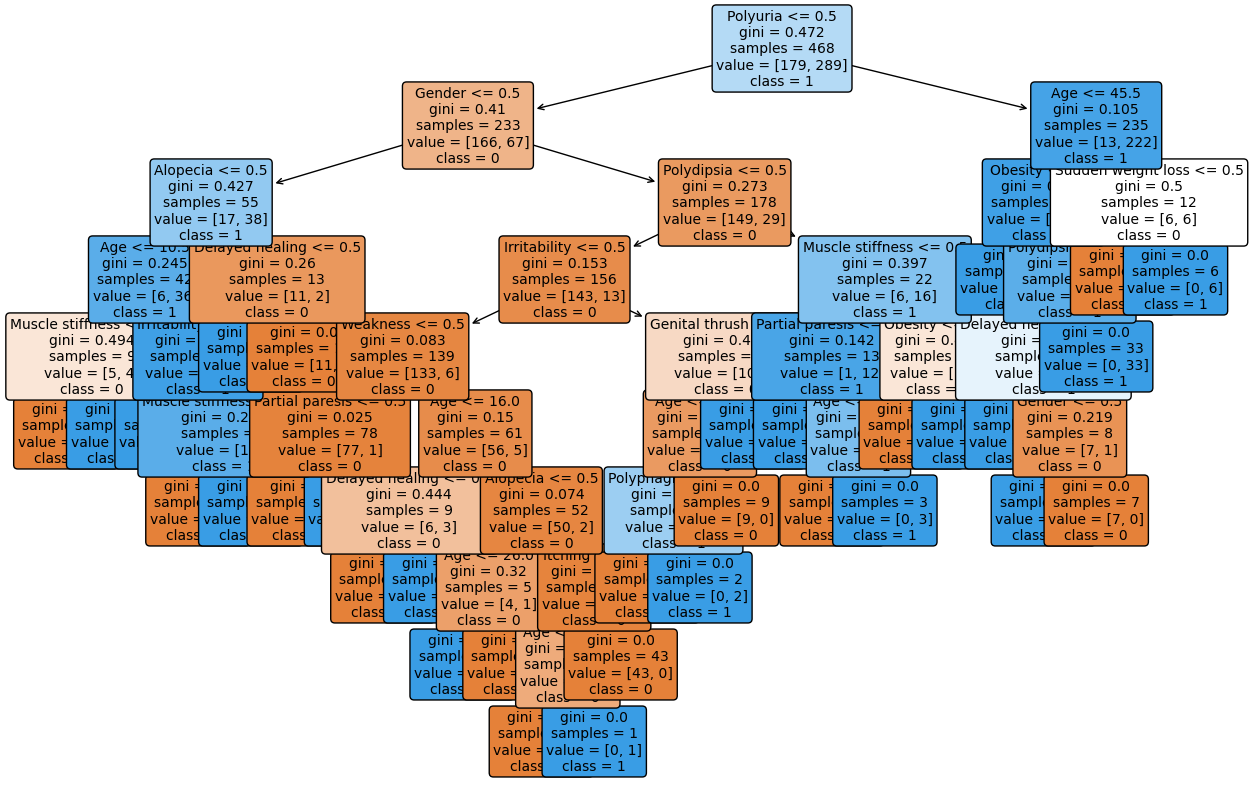

In [ ]:
plt.figure(figsize=(15,10))
plot_tree(tree,feature_names=X_train.columns,
          class_names=tree.classes_.astype(str),  # Show class names
          filled=True,  # Color the nodes based on the class they represent
          rounded=True,  # Round the corners of the nodes
          fontsize=10)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
scores=[]
for i in range(1,11):
    rd=RandomForestClassifier(n_estimators=i, random_state=42)
    rd.fit(X_train,y_train)
    y1_pred=rd.predict(X_test)
    scores.append(accuracy_score(y_test,y1_pred))

C:\Users\Nagendra Prasad\anaconda\Lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: >

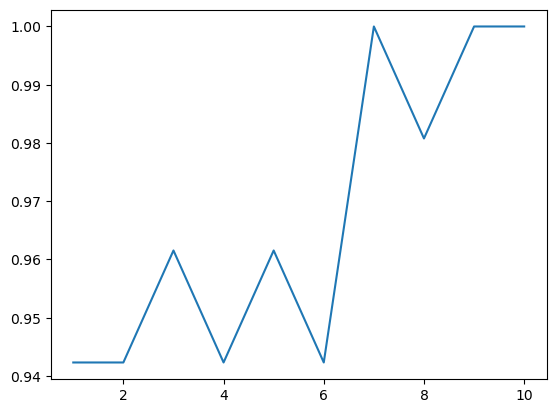

In [ ]:
sns.lineplot(range(1,11),scores)